In [23]:
pip install pandas matplotlib prophet openpyxl

In [24]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("/content/task1futureinters.csv")

In [26]:
print(df.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


In [27]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df = df.groupby('Date')['Sales'].sum().reset_index()

In [28]:
df.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)
display(df.head())

,ds,y
0,2015-07-04,1459135.0
1,2015-07-05,269248.0
2,2015-07-06,7540473.0
3,2015-07-07,6393024.0
4,2015-07-08,6915625.0


In [29]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
model.add_country_holidays(country_name='IN')  # Add Indian holidays (optional)
model.fit(df)

/usr/local/lib/python3.11/dist-packages/holidays/countries/india.py:182: Warning: Requested Holidays are available only from 2001 to 2035.
  warnings.warn(warning_msg, Warning)
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8aw0jilt/svz2uvf9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8aw0jilt/fm1kb03o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53536', 'data', 'file=/tmp/tmp8aw0jilt/svz2uvf9.json', 'init=/tmp/tmp8aw0jilt/fm1kb03o.json', 'output', 'file=/tmp/tmp8aw0jilt/prophet_modelqxcde0ps/prophet_model-20250710062508.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:25:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:25:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done 

In [30]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

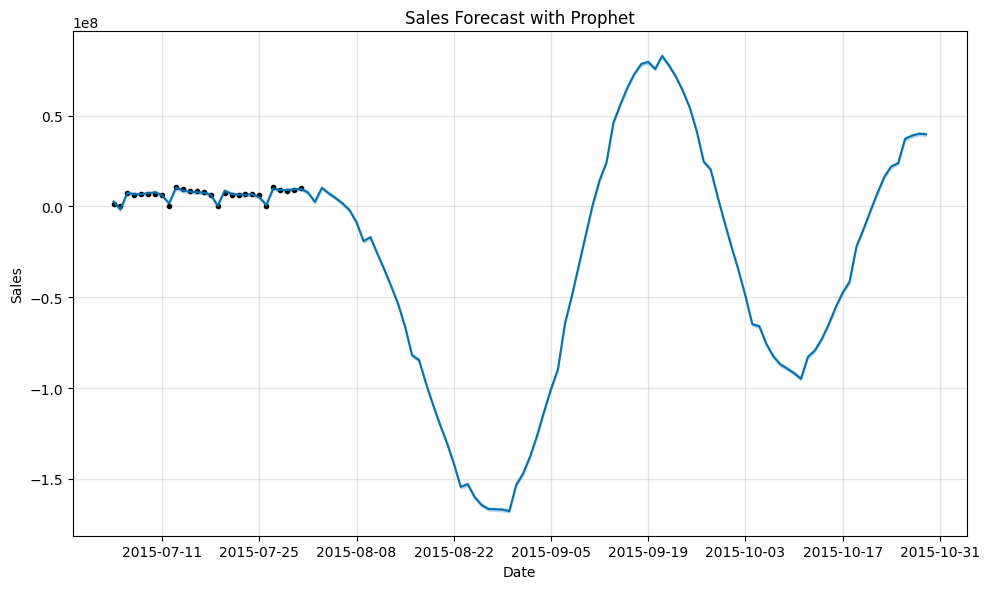

In [31]:
model.plot(forecast)
plt.title("Sales Forecast with Prophet")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

In [32]:
forecast_final = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_final = forecast_final.merge(df[['ds', 'y']], on='ds', how='left')  # Add actual sales
forecast_final.to_excel("sales_forecast_output.xlsx", index=False)

In [33]:
print("✅ Forecast exported to 'sales_forecast_output.xlsx'")

✅ Forecast exported to 'sales_forecast_output.xlsx'
